<a href="https://colab.research.google.com/github/darishkhan/Numerical-Linear-Algebra-Lab/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Mohd Darish Khan

Roll: 2101MC29

In [ ]:
#importing all necessary libraries
import numpy as np
import scipy as sp
from math import sqrt, pow, sin, cos, radians
import matplotlib.pyplot as plt

In [ ]:
#function to compute Singular Value Decomposition of any given matrix
def SelfSVD_m(A, tol=1e-8):
  AtransA = np.transpose(A)@A                  #Atranspose*A

  lamda, eigVec = sp.linalg.eig(AtransA)       #calculating the eigenvalues and eigenvectors

  sigma = {}                                   #initialing an empty dictionary
  for i in range(len(eigVec)):
    if(lamda[i]>tol):
      sigma[sqrt(np.real(lamda[i]))] = eigVec[:, i]     #mapping the eigenvectors to the eigenvalues(if greater than tolerance)

  keys = list(sigma.keys())                    #making a keys list
  keys.sort(reverse=True)                      #and sorting them in non increasing order

  eigens = {i: sigma[i] for i in keys}         #reconstructiong the sorted dictionary

  U = np.empty([len(A), len(A)])               #initialising an empty matrix to store u vectors

  k=0
  for i in eigens.keys():
    if(k>=len(U)):                             #condition for compact SVD
      break
    U[:,k] = A@eigens[i]/i
    k+=1

  sigma = np.zeros((len(A), len(A[0])))        #final sigma matrix
  k=0
  for i in eigens.keys():
    if(k>=len(A)):
      break;
    sigma[k, k] = i
    k+=1

  # returning the computed Umatrix, sigmaMatrix and VtransposeMatrix
  return (np.array(U), sigma, np.transpose(eigVec))

In [ ]:
A = np.array([[4, 0],
             [3, -5]])               #initialise some matrix to compute svd

U, s, Vt = SelfSVD_m(A, 0)           #get the SVD by designed function
print("By our function: ")
print("U = \n",U,"\n")
print("sigma = \n",s,"\n")
print("Vtranspose = \n",Vt,"\n")

U, s, Vt = sp.linalg.svd(A)          #get the SVD by built-in function
print("By inbuilt function: ")
print("U = \n",U,"\n")
print("sigma = \n",s,"\n")
print("Vtranspose = \n",Vt,"\n")

By our function: 
U = 
 [[ 0.4472136   0.89442719]
 [ 0.89442719 -0.4472136 ]] 

sigma = 
 [[6.32455532 0.        ]
 [0.         3.16227766]] 

Vtranspose = 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

By inbuilt function: 
U = 
 [[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]] 

sigma = 
 [6.32455532 3.16227766] 

Vtranspose = 
 [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]] 



In [ ]:
#function to compute Low Rank Approximation
def SelfLRA_m(A, k):
  U, s, Vt = SelfSVD_m(A)               #computing Umatrix, sigmaMatrix, VtransposeMatrix by SelfSVD function
  Ak = np.zeros((len(A), len(A[0])))    #initializing Ak as zero matrix

  for i in range(k):                    # we will loop upto k for a k rank matrix
    C = np.transpose(U[:,i])

    #updating Ak
    Ak = Ak + s[i][i]*np.matmul(np.transpose(np.atleast_2d(U[:,i])),np.atleast_2d(Vt[i,:]))

  return Ak

In [ ]:
A = np.random.random_sample((4, 5))                  #a random matrix of dimension 4x5
print("Matrix A = \n", A, "\n")

k = 2
Ak = SelfLRA_m(A, k)                                 #LRA for rank (k=2)<min(m=4,n=5)
print("Matrix Ak (where k = ", k, ") \n ", Ak,"\n")

B = np.zeros((4, 5))                                 #generating a random matrix of 4x5
for i in range(k):                                   # we will make rank of B = k
  u = np.random.random_sample((4, 1))
  vt = np.random.random_sample((1, 5))
  B = B + np.matmul(u,vt)

print("2nd norm when taken : ")                      #comparison of 2nd norm of both
print("B = Ak is : ", np.linalg.norm(A-Ak, 2))
print("B randomly: ", np.linalg.norm(A-B, 2))

print("\nFrobenius norm when taken : ")              #comparison of frobenius norm of both
print("B = Ak is : ", np.linalg.norm(A-Ak, 'fro'))
print("B randomly: ", np.linalg.norm(A-B, 'fro'))


Matrix A = 
 [[1.55332756e-02 5.93481408e-01 4.33676349e-01 8.07360529e-01
  3.15244803e-01]
 [8.92888709e-01 5.77857215e-01 1.84010202e-01 7.87929234e-01
  6.12031177e-01]
 [5.39092721e-02 4.20193680e-01 6.79068837e-01 9.18601778e-01
  4.02024891e-04]
 [9.76759149e-01 3.76580315e-01 9.73783538e-01 6.04716101e-01
  8.28845808e-01]] 

Matrix Ak (where k =  2 ) 
  [[ 0.1005135   0.48199114  0.5343613   0.82656572  0.17670081]
 [ 0.8028345   0.43059765  0.56352929  0.63273956  0.64317773]
 [-0.0086973   0.52348996  0.5661293   0.91520272  0.1116917 ]
 [ 1.03767646  0.50217797  0.66945603  0.72289521  0.8191009 ]] 

2nd norm when taken : 
B = Ak is :  0.592556493498672
B randomly:  1.02072242322969

Frobenius norm when taken : 
B = Ak is :  0.6435374532302083
B randomly:  1.3648058995715504


In [ ]:
#function to calculate Principal Component Analysis
def SelfPCA_m():
  n = 100
  np.random.seed(1)
  x1 = np.random.randn(n)
  x2 = np.random.rand(n)*0.4
  A = np.array([x1,x2])

  angle = radians(60)
  rot = np.array([[cos(angle), -sin(angle)],     #rotation matrix for 60 degrees anticlockwise rotation
                  [sin(angle), cos(angle)]])
  D = rot@A                                      #rotating A by 60 degrees anticlockwise

  plt.plot(D[0], D[1], '*')                      #plotting points of x2 - x1
  plt.axis([-4,4,-4,4])                          #graph axis from -4 to 4 on both axis

  Q = (D@np.transpose(D))/(n-1)                  #making the Covariance matrix Q

  lamda, eigVec = sp.linalg.eig(Q)               #compute the eigenvalues and eigenvectors of Q
  sigma = {}
  V = np.zeros((len(lamda), len(eigVec[0])))
  for i in range(len(eigVec)):
    sigma[sqrt(np.real(lamda[i]))] = eigVec[:, i]     #mapping the eigenvectors to the eigenvalues(if greater than tolerance)

  keys = list(sigma.keys())                    #making a keys list
  keys.sort(reverse=True)                      #and sorting them in non increasing order

  eigens = {i: sigma[i] for i in keys}
  k=0
  for i in eigens.keys():
    V[k]=eigens[i]                             #making the list of eigenvectors in non increasing order
    k+=1
  print("List of eigen vectors: ", V)
  print("Principal Component vector: ", V[0])  #this is the u1 vector

  x=np.linspace(-4, 4, 2)
  y = (V[0,1]/V[0,0])*x
  plt.plot(x, y, 'r')         #plotting the u1 vector on the graph
  plt.legend(['data points', 'principal vector direction'])

List of eigen vectors:  [[-0.48498216 -0.87452404]
 [-0.87452404  0.48498216]]
Principal Component vector:  [-0.48498216 -0.87452404]


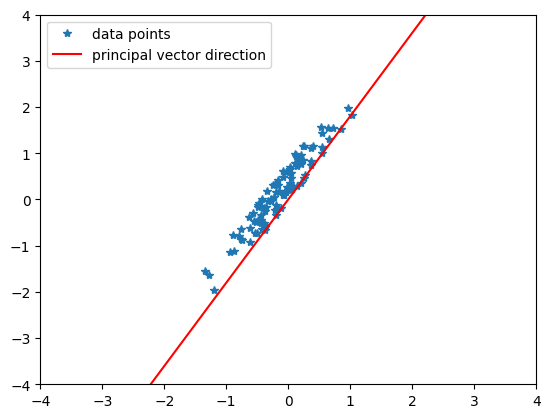

In [ ]:
SelfPCA_m()